# Abstract

In this notebook we will study the famed Iris data set.  This data set has been studied for many years by people doing machine learning.  In fact the dataset was first treated by R.A. Fisher.  He is a rather handsom fellow, and we should be particularily impressed with his goatee!

<img src="https://upload.wikimedia.org/wikipedia/commons/5/57/Satyendra_Nath_Bose%2C_Ronald_Aylmer_Fisherft_and_Prasanta_Chandra_Mahalanobis.jpg" style="width:300px">

We chose this dataset because it is well studied but also well known to be non-trivial to get good answers from it.

It is so well studied that there are even YouTube videos about it.  We can directly embed such a video in our notebook to liven up our presentation.

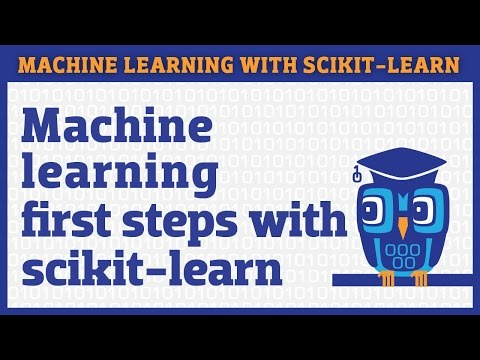

In [1]:
from IPython.lib.display import YouTubeVideo
YouTubeVideo('hd1W4CyPX58')

In fact all of the datasets that we have for this workshop come with their own descriptions.  Note this data set has been studied since 1936 (at least), and there are still open questions.  The data has many interesting features, such as 3 different classes, of varying difficulty and four dimensional features.

In [2]:
! wget https://raw.githubusercontent.com/rcpaffenroth/DS3010_public/main/Class02/basic_python_demos/iris.txt

--2023-11-20 16:41:39--  https://raw.githubusercontent.com/rcpaffenroth/DS3010_public/main/Class02/basic_python_demos/iris.txt
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 185.199.108.133, 185.199.109.133, 185.199.110.133, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|185.199.108.133|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 2998 (2.9K) [text/plain]
Saving to: ‘iris.txt’

iris.txt            100%[===================>]   2.93K  --.-KB/s    in 0s      

2023-11-20 16:41:39 (32.7 MB/s) - ‘iris.txt’ saved [2998/2998]



In [3]:
print(open('iris.txt', 'r').read())

1. Title: Iris Plants Database
	Updated Sept 21 by C.Blake - Added discrepency information

2. Sources:
     (a) Creator: R.A. Fisher
     (b) Donor: Michael Marshall (MARSHALL%PLU@io.arc.nasa.gov)
     (c) Date: July, 1988

3. Past Usage:
   - Publications: too many to mention!!!  Here are a few.
   1. Fisher,R.A. "The use of multiple measurements in taxonomic problems"
      Annual Eugenics, 7, Part II, 179-188 (1936); also in "Contributions
      to Mathematical Statistics" (John Wiley, NY, 1950).
   2. Duda,R.O., & Hart,P.E. (1973) Pattern Classification and Scene Analysis.
      (Q327.D83) John Wiley & Sons.  ISBN 0-471-22361-1.  See page 218.
   3. Dasarathy, B.V. (1980) "Nosing Around the Neighborhood: A New System
      Structure and Classification Rule for Recognition in Partially Exposed
      Environments".  IEEE Transactions on Pattern Analysis and Machine
      Intelligence, Vol. PAMI-2, No. 1, 67-71.
      -- Results:
         -- very low misclassification rates (0% for t

<img src="https://upload.wikimedia.org/wikipedia/commons/thumb/4/41/Iris_versicolor_3.jpg/640px-Iris_versicolor_3.jpg" style="width:300px">

# Loading in the libraries.

In [4]:
# Old libraries that we know and love.
import numpy as np
import pandas as pa
import sklearn
import matplotlib.pylab as py
from mpl_toolkits.mplot3d import Axes3D
from matplotlib.colors import ListedColormap

%matplotlib inline

# Introduction

The first thing that Randy does with data is to take a a look at this, so we thought that we would do the same thing.  So, we begin our analysis by reading in the data.   This was not as trivial as we have originally thought since we kept running into errors.  The problem was that:

<b> we needed to make sure the data was in the correct directory</b>

The eaisiest thing to do is have the data in the same directory at the Jupyter notebook.

In [5]:
ls

iris.txt  sample_data/


In [6]:
! wget https://raw.githubusercontent.com/rcpaffenroth/DS3010_public/main/Class02/basic_python_demos/iris.csv

--2023-11-20 16:41:41--  https://raw.githubusercontent.com/rcpaffenroth/DS3010_public/main/Class02/basic_python_demos/iris.csv
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 185.199.108.133, 185.199.109.133, 185.199.110.133, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|185.199.108.133|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 2620 (2.6K) [text/plain]
Saving to: ‘iris.csv’

iris.csv            100%[===================>]   2.56K  --.-KB/s    in 0s      

2023-11-20 16:41:41 (34.7 MB/s) - ‘iris.csv’ saved [2620/2620]



In [7]:
data = pa.read_csv('iris.csv')

The size of our data was

In [8]:
data.shape

(150, 5)

Which means we have 150 total measurements and each measurement has 5 values.  For examples our first measurement is

In [9]:
data.iloc[0,:]

sepal length    5.1
sepal width     3.5
petal length    1.4
petal width     0.2
flower type     0.0
Name: 0, dtype: float64

Observe that we want to predict the flower type from the predictors

1. sepal length
2. sepal width
3. petal length
4. petal width

<img src="https://upload.wikimedia.org/wikipedia/commons/thumb/4/41/Iris_versicolor_3.jpg/640px-Iris_versicolor_3.jpg" style="width:300px">

# Looking at the data

In [10]:
X = np.array(data.iloc[:, :-1])
y = np.array(data.iloc[:, -1])

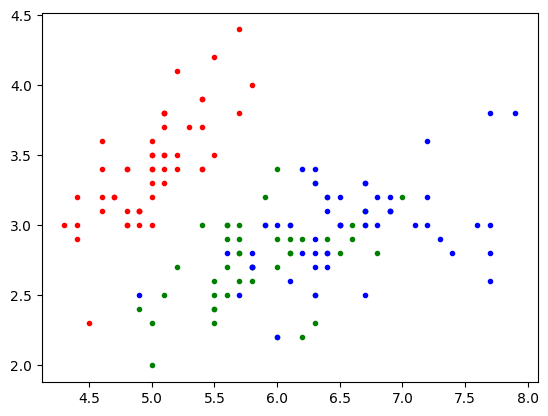

In [11]:
py.figure()
py.plot(X[y==0,0],X[y==0,1],'r.')
py.plot(X[y==1,0],X[y==1,1],'g.')
py.plot(X[y==2,0],X[y==2,1],'b.')

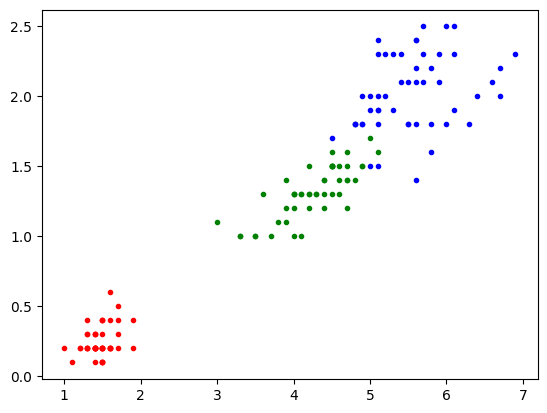

In [12]:
py.figure()
py.plot(X[y==0,2],X[y==0,3],'r.')
py.plot(X[y==1,2],X[y==1,3],'g.')
py.plot(X[y==2,2],X[y==2,3],'b.')

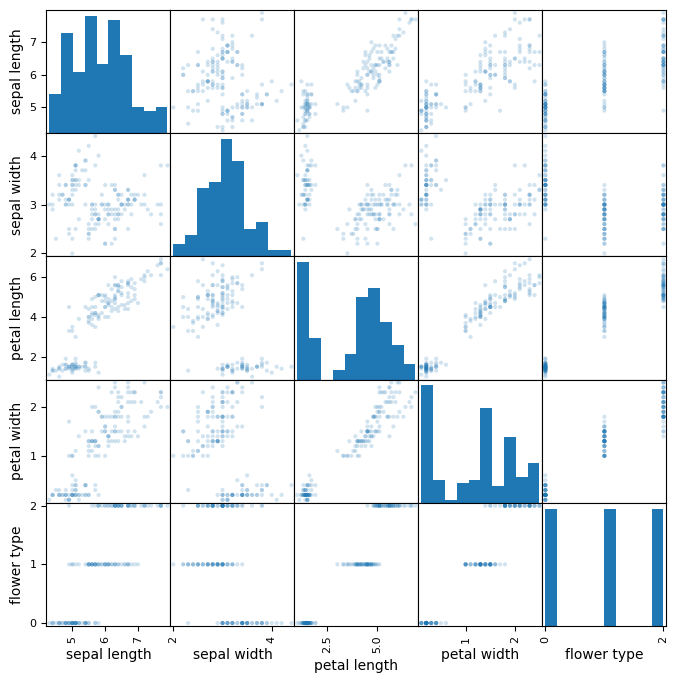

In [13]:
pa.plotting.scatter_matrix(data, alpha=0.2, figsize=(8,8));

In [14]:
fig = py.figure(figsize=(8, 6))
ax = Axes3D(fig, elev=-150, azim=110)
ax.scatter(X[y==0, 0], X[y==0, 1], X[y==0, 2], c='r')
ax.scatter(X[y==1, 0], X[y==1, 1], X[y==1, 2], c='g')
ax.scatter(X[y==2, 0], X[y==2, 1], X[y==2, 2], c='b')

<Figure size 800x600 with 0 Axes>

# Data processing

## Asking the right question

One of the most important aspects of data analysis is to ask the right question. So, we thought that we would preprocess our data to ask two different questions, one we think is easy, and one we think is hard.  The easy question we propose is to
just distinguish class 0 from classes 1 and 2.  Based upon our visualizations, we assume that this problem willl be very easy to solve using the petal lengths and petal widths

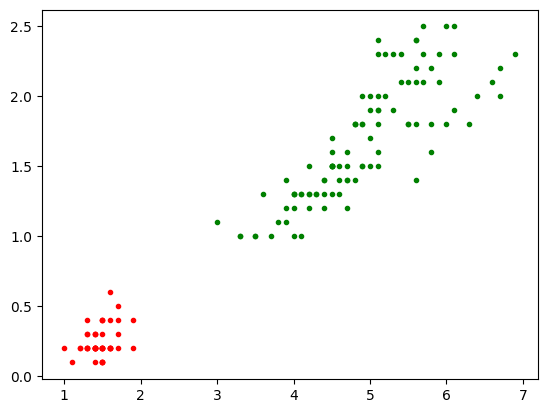

In [15]:
py.figure()
py.plot(X[y==0,2],X[y==0,3],'r.')
py.plot(X[y!=0,2],X[y!=0,3],'g.')

We also plan to test the sepal widths and the sepal lengths, even though that problem will likely be harder.

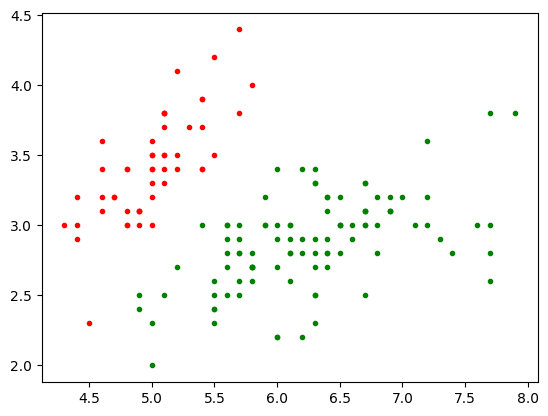

In [16]:
py.figure()
py.plot(X[y==0,0],X[y==0,1],'r.')
py.plot(X[y!=0,0],X[y!=0,1],'g.')

Finally we will test the full data set (all four columns) against all three classes.  However, plotting this data is rather difficult, so we needed to try something more advanced.  Randy suggested Principal Component Analysis, so we gave that a try.

##  Principle Component Analysis (PCA)

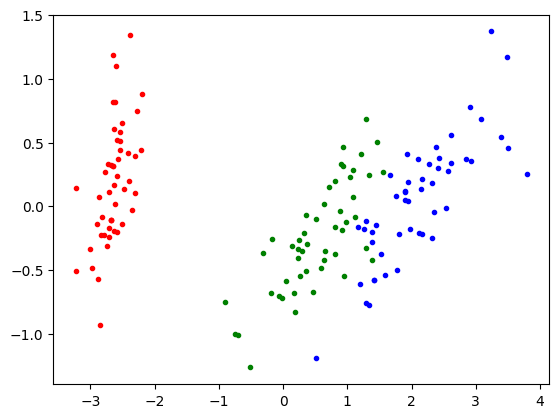

In [17]:
from sklearn.decomposition import PCA
py.figure()
XPCA = PCA(n_components=3).fit_transform(X)
py.plot(XPCA[y==0,0],XPCA[y==0,1],'r.')
py.plot(XPCA[y==1,0],XPCA[y==1,1],'g.')
py.plot(XPCA[y==2,0],XPCA[y==2,1],'b.')

Just as one can project from a high dimensional space to a two-dimensional space, one can also do the same thing to project to a three-dimensional space.

# Our first classification tool, K-Nearest Neighbors.

http://scikit-learn.org/stable/modules/generated/sklearn.neighbors.KNeighborsClassifier.html

n_neighbors : int, optional (default = 5)
Number of neighbors to use by default for k_neighbors queries.

weights : str or callable, optional (default = ‘uniform’)
weight function used in prediction. Possible values:
‘uniform’ : uniform weights. All points in each neighborhood are weighted equally.
‘distance’ : weight points by the inverse of their distance. in this case, closer neighbors of a query point will have a greater influence than neighbors which are further away.
[callable] : a user-defined function which accepts an array of distances, and returns an array of the same shape containing the weights.

metric : string or DistanceMetric object (default = ‘minkowski’)
the distance metric to use for the tree. The default metric is minkowski, and with p=2 is equivalent to the standard Euclidean metric. See the documentation of the DistanceMetric class for a list of available metrics.

p : integer, optional (default = 2)
Power parameter for the Minkowski metric. When p = 1, this is equivalent to using manhattan_distance (l1), and euclidean_distance (l2) for p = 2. For arbitrary p, minkowski_distance (l_p) is used.

metric_params : dict, optional (default = None)
Additional keyword arguments for the metric function.

In [70]:
# Import the K-NN solver
from sklearn import neighbors
clf = neighbors.KNeighborsClassifier(n_neighbors=1)

http://scikit-learn.org/stable/modules/generated/sklearn.svm.LinearSVC.html

C : float, optional (default=1.0)
Penalty parameter C of the error term.

loss : string, ‘hinge’ or ‘squared_hinge’ (default=’squared_hinge’)
Specifies the loss function. ‘hinge’ is the standard SVM loss (used e.g. by the SVC class) while ‘squared_hinge’ is the square of the hinge loss.

penalty : string, ‘l1’ or ‘l2’ (default=’l2’)
Specifies the norm used in the penalization. The ‘l2’ penalty is the standard used in SVC. The ‘l1’ leads to coef_ vectors that are sparse.

class_weight : {dict, ‘balanced’}, optional
Set the parameter C of class i to class_weight[i]*C for SVC. If not given, all classes are supposed to have weight one. The “balanced” mode uses the values of y to automatically adjust weights inversely proportional to class frequencies in the input data as n_samples / (n_classes * np.bincount(y))

In [71]:
# # Load in a classifier
# from sklearn import svm

# clf = svm.LinearSVC()

http://scikit-learn.org/stable/modules/generated/sklearn.tree.DecisionTreeClassifier.html#sklearn.tree.DecisionTreeClassifier

criterion : string, optional (default=”gini”)
The function to measure the quality of a split. Supported criteria are “gini” for the Gini impurity and “entropy” for the information gain.

max_depth : int or None, optional (default=None)
The maximum depth of the tree. If None, then nodes are expanded until all leaves are pure or until all leaves contain less than min_samples_split samples.

min_samples_split : int, float, optional (default=2)
The minimum number of samples required to split an internal node:
If int, then consider min_samples_split as the minimum number.
If float, then min_samples_split is a percentage and ceil(min_samples_split * n_samples) are the minimum number of samples for each split.

min_samples_leaf : int, float, optional (default=1)
The minimum number of samples required to be at a leaf node:
If int, then consider min_samples_leaf as the minimum number.
If float, then min_samples_leaf is a percentage and ceil(min_samples_leaf * n_samples) are the minimum number of samples for each node.

max_leaf_nodes : int or None, optional (default=None)
Grow a tree with max_leaf_nodes in best-first fashion. Best nodes are defined as relative reduction in impurity. If None then unlimited number of leaf nodes.

class_weight : dict, list of dicts, “balanced” or None, optional (default=None)
Weights associated with classes in the form {class_label: weight}. If not given, all classes are supposed to have weight one. For multi-output problems, a list of dicts can be provided in the same order as the columns of y.
The “balanced” mode uses the values of y to automatically adjust weights inversely proportional to class frequencies in the input data as n_samples / (n_classes * np.bincount(y))
For multi-output, the weights of each column of y will be multiplied.
Note that these weights will be multiplied with sample_weight (passed through the fit method) if sample_weight is specified.

In [72]:
# # Decision tree classifier
# from sklearn import tree

# clf = tree.DecisionTreeClassifier()

http://scikit-learn.org/stable/modules/generated/sklearn.discriminant_analysis.LinearDiscriminantAnalysis.html

n_components : int, optional
Number of components (< n_classes - 1) for dimensionality reduction.

In [73]:
# # Linear Disciminant Analysis
# from sklearn import discriminant_analysis

# clf = discriminant_analysis.LinearDiscriminantAnalysis()

In [74]:
# This is the one complicated bit of code in the whole demo.  There is no need to modify it, but please feel free if you want!
def runTest(clf,X,y,trainingPercent=0.66):
    # A little cheat to make the pictures consistent
    np.random.seed(123)

    # If there is one thing that I want to harp on, it is the difference
    # between testing and training errors!  So, here we create a training
    # set on which we computer the parameters of our algorithm, and a
    # testing set for seeing how well we generalize (and work on real
    # world problems).
    perm = np.random.permutation(len(y))
    n = X.shape[0]
    trainSize = int(trainingPercent*n)
    Xtrain = X[perm[:trainSize],0:2]
    Xtest = X[perm[trainSize:],0:2]

    yHat = y
    yHattrain = yHat[perm[:trainSize]]
    yHattest = yHat[perm[trainSize:]]

    # Run the calculation!
    clf.fit(Xtrain, yHattrain)

    # step size in the mesh for plotting the decision boundary.
    h = .02
    # Plot the decision boundary. For that, we will assign a color to each
    # point in the mesh [x_min, m_max]x[y_min, y_max].
    x_min, x_max = X[:, 0].min() - 1, X[:, 0].max() + 1
    y_min, y_max = X[:, 1].min() - 1, X[:, 1].max() + 1
    xx, yy = np.meshgrid(np.arange(x_min, x_max, h),
                             np.arange(y_min, y_max, h))
    Z = clf.predict(np.c_[xx.ravel(), yy.ravel()])

    # Put the result into a color plot
    Z = Z.reshape(xx.shape)

    py.figure(figsize=(8, 6))
    cmap_light = ListedColormap(['#FFAAAA', '#AAFFAA', '#AAAAFF'])
    cmap_bold = ListedColormap(['#FF0000', '#00FF00', '#0000FF'])
    py.pcolormesh(xx, yy, Z, cmap=cmap_light)

    # Plot also the training points
    py.scatter(Xtrain[:, 0], Xtrain[:, 1], c=yHattrain, cmap=cmap_bold,marker='o')
    py.scatter(Xtest[:, 0], Xtest[:, 1], c=yHattest, cmap=cmap_bold,marker='+')
    py.xlim(xx.min(), xx.max())
    py.ylim(yy.min(), yy.max())

    # Print out some metrics
    print('training score',clf.score(Xtrain,yHattrain))
    print('testing score',clf.score(Xtest,yHattest))

The problem we though would be easy was easy!

training score 1.0
testing score 1.0


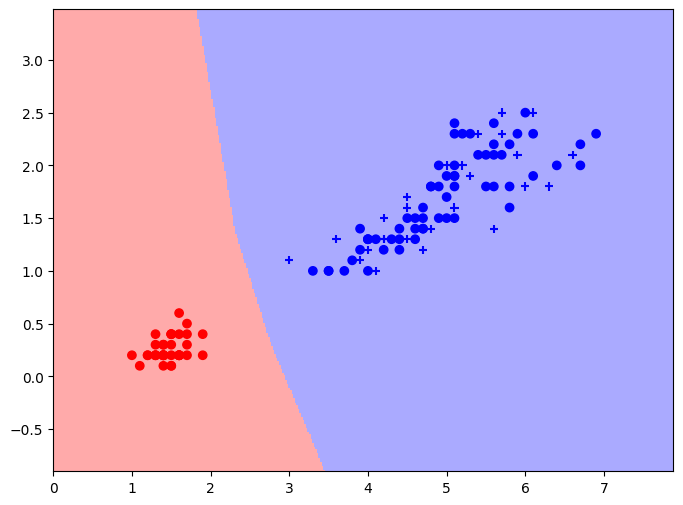

In [75]:
yEasy = y.copy()
yEasy[y==2] = 1
runTest(clf,X[:,[2,3]],yEasy)

The problem we thought would be a bit harder was still pretty easy.

training score 1.0
testing score 1.0


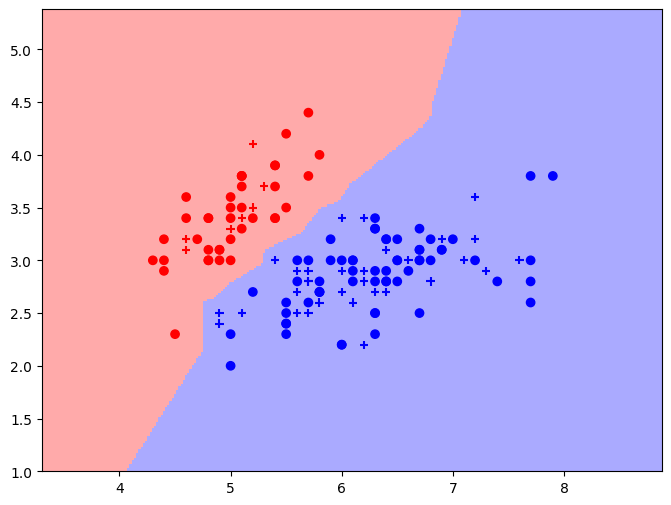

In [76]:
yEasy = y.copy()
yEasy[y==2] = 1
runTest(clf,X[:,[0,1]],yEasy)

## Testing the hypothesis that the problem we thought was hard actually is hard

The hard problem is hard, and we pretty clearly overfit!

training score 0.9191919191919192
testing score 0.7058823529411765


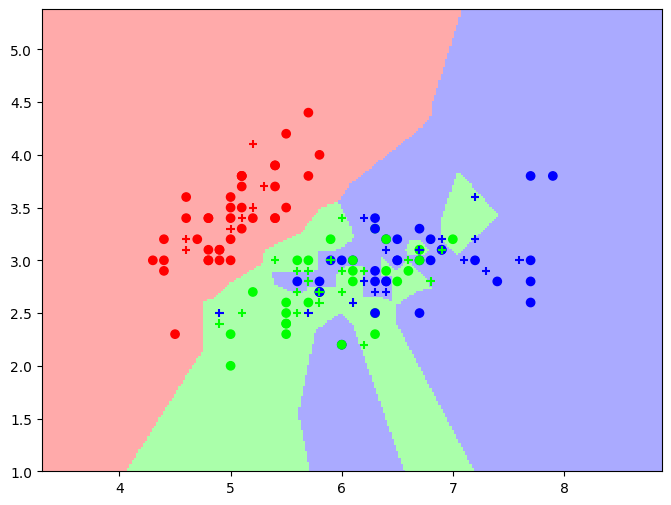

In [77]:
runTest(clf,X[:,[0,1]],y)

However, Randy won't be mad since we figured out we were overfitting!

## A better way of analyzing the data

Thinking about what must have to been going on, we decided to try a different projection of the data.

training score 0.98989898989899
testing score 0.9411764705882353


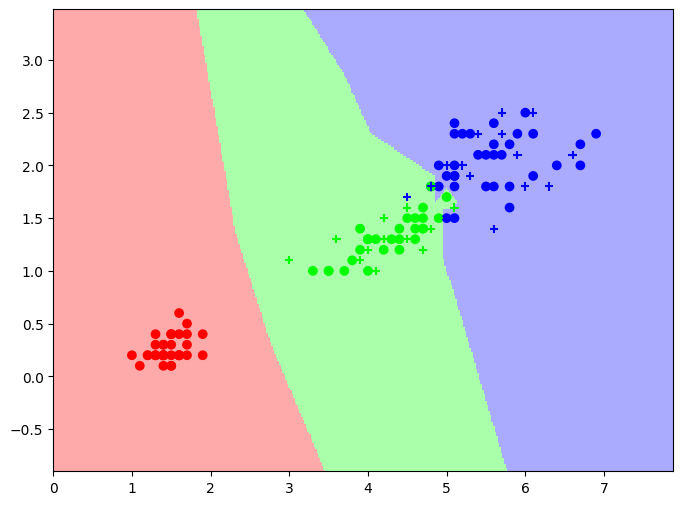

In [78]:
runTest(clf,X[:,[2,3]],y)

## More advanced techniques and other explorations

Getting just a bit fancier, we actually do PCA!!

training score 1.0
testing score 0.9803921568627451


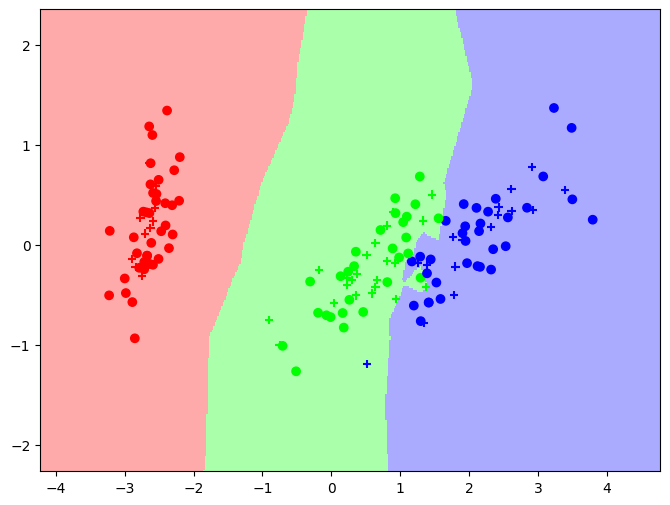

In [79]:
runTest(clf,XPCA[:,[0,1]],y)

What happens if we reduce the training data by a lot?

training score 1.0
testing score 0.9166666666666666


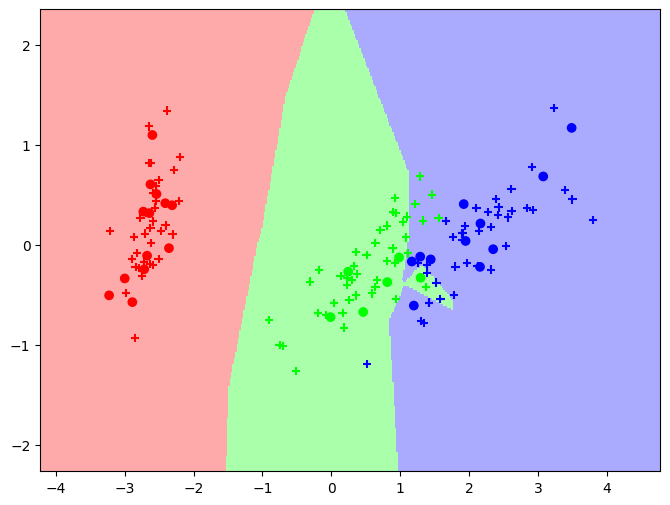

In [80]:
runTest(clf,XPCA[:,[0,1]],y, trainingPercent = 0.2)

Of course, that makes the results much worse!